#  pysumma Examples 1 (Testcase Figure 7)

### _pysumma is object oriented python wrapper for SUMMA Model (Structure for Unifying Multiple Modeling Alternatives)_

This jupyter notebook demonstrates how to maniputate SUMMA setting file, run summa model, and display output using pysumma package.

1. How to manipulate file Manager text file that controls setting, input, and output Directory and filename.

2. How to manipulate Decision text file that controls the simulation start and finish time and 27 analysis methods.  

3. How to run summa model

4. How to display summa output (file format : netCDF)

## (1) Basin Description 

Location : The Raynolds Mountain East catchment in southwestern Idaho

* Describe Location with map

In [ ]:
Area : 

In [ ]:
Hru : 

In [ ]:
## (2) 

## (1) manipulating file Manager file

In [ ]:
Decribe filemanger file

In [ ]:
Check each of the item such as Area, data ?

### 1) import Simulation Module

In [1]:
from pysumma.Simulation import Simulation

### 2) read file_Manager text file and create S attribute

In [21]:
S = Simulation('C:/pysumma/summatestcases-2.x/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenJarvis.txt')

### 3) make attribute of decision and get filepath

In [39]:
S.decision_path.filepath

'wrrPaperTestCases/figure01/'

### 4) get filename of decision attribute

In [40]:
S.decision_path.filename

'summa_zDecisions_riparianAspenCLM2stream.txt'

### 5) get name of decision attribute

In [41]:
S.decision_path.name

'decision'

## (2) manipulating Decision text file.

In [ ]:
Decribe Decision file

### 1) read Decision text file and create D attribute

In [6]:
D = S.decision_obj

### 2) make attribute and get default value of simulation start date and time

In [43]:
D.simulStart.value

'2005-07-01 00:00'

### 3) set value of simulation start date and time in Decision text file

In [8]:
D.simulStart.value = "2006-07-01 00:00"

### 4) set value of simulation finish date and time in Decision text file

In [9]:
D.simulFinsh.value = "2007-09-30 00:00"

### 5) make attribute for (03) soil category dataset and get abstract method name 

In [46]:
D.soilCatTbl.name

'soilCatTbl'

### 6) get default value in Decision text file

In [47]:
D.soilCatTbl.value

'ROSETTA'

### 7) get available options for (03) soil category dataset

In [48]:
D.soilCatTbl.options

['STAS', 'STAS-RUC', 'ROSETTA']

### 8) get description for (03) soil category dataset

In [49]:
D.soilCatTbl.description

'soil-category dateset'

### 9) set option for (03) soil category dataset

In [14]:
D.soilCatTbl.value = 'STAS-RUC'

## (3) running summa model.

### 1) create S.executable attribute and get summa executable file

In [15]:
S.executable = "/home/hydro/Downloads/summa-master/bin/summa.exe"

### 2) set suffix for output filename

In [16]:
S.run_suffix = "pysumma_demo"

### 3) run summa model

In [17]:
S.execute()

## (4) displaying summa output

### - plotting line plot with variables (1D, 2D)

### 1) import Plotting Module

In [18]:
from pysumma.Plotting import Plotting
from jupyterthemes import jtplot
jtplot.figsize(x=10, y=10)

### 2) get netCDF file and create P attribute

In [19]:
P = Plotting(S.output_path.filepath + S.output_prefix.value+'_' + D.simulStart.value[0:4] + '-' + D.simulFinsh.value[0:4] + '_' + S.run_suffix + '_1.nc')

### 3) open and read netCDF file and create P_info attribute

In [56]:
P_info = P.open_netcdf()

<xarray.Dataset>
Dimensions:                  (hru: 1, ifcSoilAndTime: 153230, ifcTotoAndTime: 153230, midSoilAndTime: 153230, midTotoAndTime: 153230, time: 8737)
Coordinates:
  * time                     (time) datetime64[ns] 2006-10-01 ...
  * hru                      (hru) int32 1
Dimensions without coordinates: ifcSoilAndTime, ifcTotoAndTime, midSoilAndTime, midTotoAndTime
Data variables:
    pptrate                  (time, hru) float64 ...
    airtemp                  (time, hru) float64 ...
    basin__SurfaceRunoff     (time) float64 ...
    basin__ColumnOutflow     (time) float64 ...
    basin__AquiferStorage    (time) float64 ...
    basin__AquiferRecharge   (time) float64 ...
    basin__AquiferBaseflow   (time) float64 ...
    basin__AquiferTranspire  (time) float64 ...
    averageInstantRunoff     (time) float64 ...
    averageRoutedRunoff      (time) float64 ...
    nSnow                    (time, hru) int32 ...
    nSoil                    (time, hru) int32 ...
    nLayers 

### 4) Display 1D (netCDF, variable[basin__AquiferRecharge]) with time series

*variables = [ ['basin SurfaceRunoff','2'], ['basin  ColumnOutflow','3'],        ['basin  AquiferStorage','4'], ['basin  AquiferRecharge', '5'],            ['basin  AquiferBaseflow', '6'], ['basin  AquiferTranspire','7'],                    ['averageInstantRunoff', '8'], ['averageRoutedRunoff', '9'] ] *

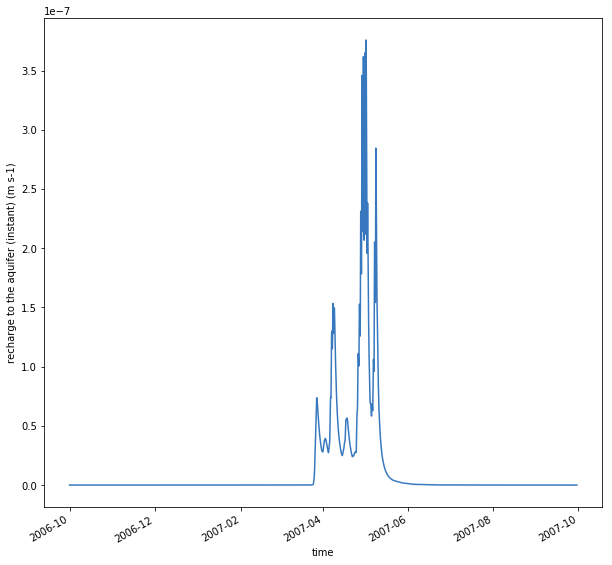

In [57]:
P.plot_1d(P_info, 5)

### 5) Display 1D_hru (netCDF, hru, variable[scalarSWE]) with time series

*variable  = [ ['pptrate','0'], ['airtemp','1'], ['nSnow','10'], ['nSoil','11'],
                  ['nLayers','12'], ['midSoilStartIndex','13'], ['midTotoStartIndex','14'], 
                  ['ifcSoilStartIndex','15'], ['ifcTotoStartIndex','16'], ['scalarSWE','17'],
                  ['scalarSurfaceTemp','23'], ['scalarSenHeatTotal','27'],
                  ['scalarLatHeatTotal','28'], ['scalarSnowSublimation','29'],
                  ['scalarThroughfallSnow','30'], ['scalarThroughfallRain','31'],
                  ['scalarRainPlusMelt','32'], ['scalarInfiltration','33'],
                  ['scalarExfiltration','34'], ['scalarSurfaceRunoff','35'] ]*

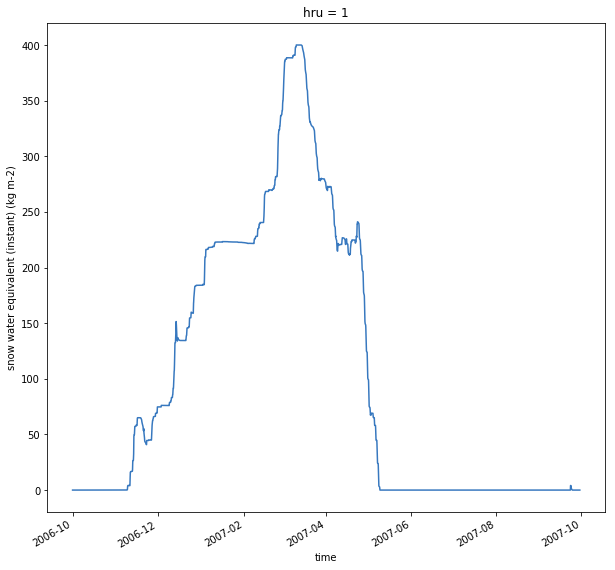

In [58]:
P.plot_1d_hru(P_info, 0, 17)

### 6) Display 1D_layer (netCDF, hru, variable[iLayerHeight], layer time[midTotoStartIndex]) with time series

*variable = [ ['mLayerTemp','18'], ['mLayerVolFracIce','19'], ['mLayerVolFracLiq','20'], 
                  ['mLayerVolFracWat','21'],  ['mLayerMatricHead','22'], ['mLayerDepth','24'],  
                  ['mLayerHeight','25'],  ['iLayerHeight','26'], ['iLayerLiqFluxSoil','36'], 
                  ['mLayerLiqFluxSoil','37'] ]*
                  
*layer_time = [ ['midSoilStartIndex','13'], ['midTotoStartIndex','14'], 
              ['ifcSoilStartIndex','15'], ['ifcTotoStartIndex','16'] ]*    

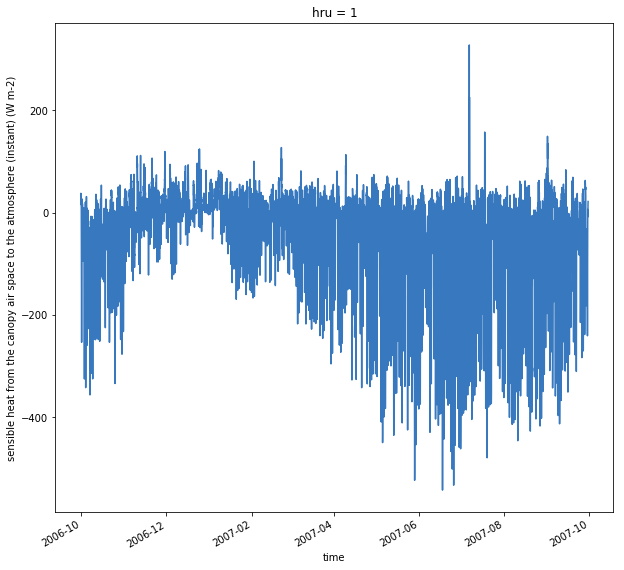

In [59]:
P.plot_1d_layer(P_info, 0, 26, 14)

### - Display plot from summa_plot repository created by andrew bennett from UW

### 1) import hovmoller, layers modules

In [24]:
from pysumma.hovmoller import hovmoller
from pysumma.layers import layers
import xarray as xr
jtplot.figsize(x=10,y=10)

### 2) get netCDF file and create ds attribute

In [25]:
ds = xr.open_dataset(S.output_path.filepath + S.output_prefix.value+'_' + D.simulStart.value[0:4] + '-' + D.simulFinsh.value[0:4] + '_' + S.run_suffix + '_1.nc')

### 3) plot hovmoller module about air temp

False True False True


/home/hydro/miniconda3/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


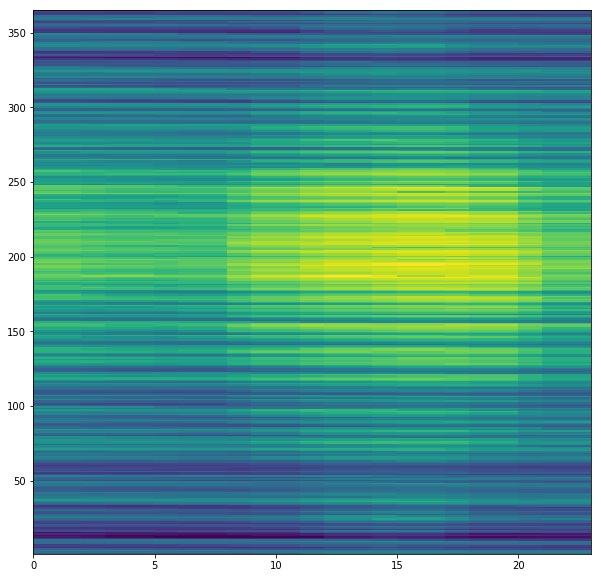

In [62]:
hovmoller(ds['airtemp'], xdim='hour', ydim='dayofyear')

### 4) plot layers graph module about mLayerVolFracWat

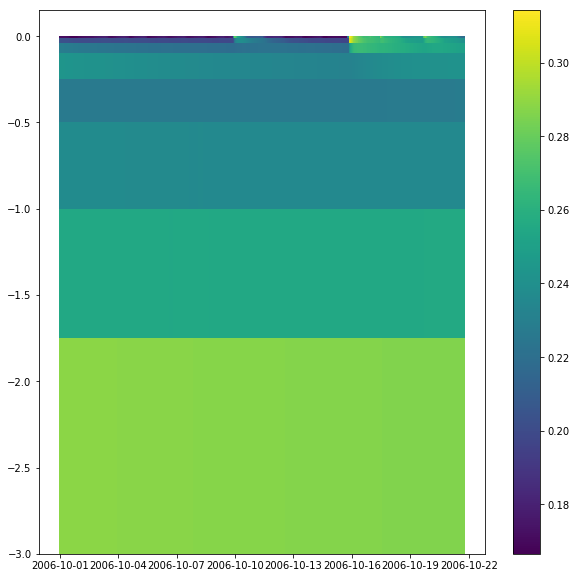

In [63]:
da = ds.isel(hru=0)
layers(da.isel(time=slice(0,500)), 'mLayerVolFracWat')